# **P2 de Sistemas Distribuídos:**

**Instituto Federal Fluminense** - Campus Itaperuna

**Bacharel em Sistemas de Informação** - 7o Período

**Nome** : Lucas S. de Lima

O código abaixo apresenta um exemplo clássico de algoritmo combinatório para encontrar as soluções da soma de uma lista de valores.
Descrição do Problema:
O Computador deve gerar uma lista de Números Naturais aleatórios, de dimenssão passada por parâmetro.
Uma soma de valor '10' foi atribuída para efeito de cálculo.
O programa deve retornar as combinações que apresentam a soma da lista igual ao valor definido (no caso 10).


#### **Código1**

In [ ]:
%%writefile Prova_Prog_Paralela.py
#Importação das bibliotecas
import os
import random
import sys

random.seed(1) #Utilizado aqui para efeito de estudo, pois os mesmos valores
               #serão sorteados sempre, facilitando a explicação.

#Recebendo a lista de valores por parâmetro do sistema
tam_lista = int(sys.argv[1])
SOMA = 10 #Valor de soma atribuído - Poderia ser qualquer valor.

combinacoes = [] #Esta lista guarda todas as combinações de somas possíveis.

#Gerando as combinações de números da lista possíveis, dependendo do tamanho
#passado por parâmetro (tam_lista).
#As combinações de números da lista será de ordem "2^tam_lista", iniciando
#em: 0000...0 até 1111...1. 
print('\nCombinações: ')
for i in range(0, 2**tam_lista):
  x = bin(i)
  #print(x)
  combinacoes.append(x.split('b')[1].zfill(tam_lista))
print(combinacoes)
print()

#Serão gerados aleatóriamente uma quantidade de números definida por 'tam_lista'
sorteio = ''
for x in range(0,tam_lista):
    sorteio += str(random.randint(1,10)) + ' '
sorteio = sorteio[:len(sorteio)-1].split(' ')
print('\nNº sorteados:')
print(sorteio)

print('\nCombinações que apresentam a soma %d' %SOMA)
total = 0
for l in combinacoes:
  soma = 0
  fatores = list(l)
  for pos in range(0, len(l)):
    soma += int(fatores[pos]) * int(sorteio[pos])
  if soma == SOMA:
    total += 1
    print(sorteio)
    print(fatores)
    print()
print('Total de combinações com a soma %d: %d' % (SOMA, total))

Overwriting Prova_Prog_Paralela.py


#### **Script1**

In [ ]:
!python Prova_Prog_Paralela.py 5


Combinações: 
['00000', '00001', '00010', '00011', '00100', '00101', '00110', '00111', '01000', '01001', '01010', '01011', '01100', '01101', '01110', '01111', '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111', '11000', '11001', '11010', '11011', '11100', '11101', '11110', '11111']


Nº sorteados:
['3', '10', '2', '5', '2']

Combinações que apresentam a soma 10
['3', '10', '2', '5', '2']
['0', '1', '0', '0', '0']

['3', '10', '2', '5', '2']
['1', '0', '0', '1', '1']

['3', '10', '2', '5', '2']
['1', '0', '1', '1', '0']

Total de combinações com a soma 10: 3


Após executar o código acima, passando um parâmetro de '5', podemos observar quais as combinações possíveis de 5 números: 00000 - 11111.

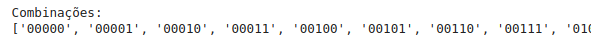

Em seguida, o código mostra a lista de 5 números sorteados aleatóriamente.

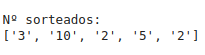

Assim, não é difícil definir quais as combinações de números que apresentem uma soma igual ao definido no algorítimo(10).

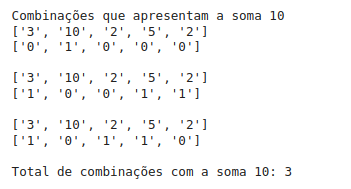


### **Verificando o crescimento do custo computacional para resolver o código anterior**
Como o tamanho do problema (a quantidade de números), pode ser passada por parâmetro, podemos monitorar o tempo de execução do código em cada situação, 
 dependendo da quantidade de números da lista.

#### **Script2**

In [ ]:
import time as t
tempo_exec=[]
tempo_teorico=[]
for i in range(15, 23):
  tempo_atual = t.time()
  string = 'python Prova_Prog_Paralela.py '+str(i)+' >> /dev/null' #Jogando a saida para null para não poluir o terminal
  !$string
  tempo_final = t.time()
  tempo_final -= tempo_atual
  tempo_exec.append((i,tempo_final))
  #Comparando os resultados com os valores de f(i) = 2*f(i-1)
  tempo_teorico.append((i+1, tempo_final*2))
print(tempo_exec) 
print(tempo_teorico)

[(15, 0.423168420791626), (16, 1.3160405158996582), (17, 2.4315550327301025), (18, 4.334340333938599), (19, 13.009908676147461), (20, 13.069246053695679), (21, 27.33614158630371), (22, 58.97644066810608)]
[(16, 0.846336841583252), (17, 2.6320810317993164), (18, 4.863110065460205), (19, 8.668680667877197), (20, 26.019817352294922), (21, 26.138492107391357), (22, 54.67228317260742), (23, 117.95288133621216)]


Como podemos observar, existe uma grande variação de tempo de execução ao alterar uma pequena quantidade de números da lista:


*   15 números = 0.426 segundos
*   22 números = 52.234 segundos.

Outra Característica interessante qu podemos observar é a aproximação do tempo de execução em um determinado instante ser semelhante ao dobro do tempo no instante anterior:

$f(x) = 2^t$

 Onde $t$ é a quantidade de números da lista



### **Plotando o gráfico do Tempo de Execução:**
Como podemos observar no gráfico anterior, o tempo de sexecução foi próximo de 0
para uma lista de 15 números e rapidamente cresceu para mais que 55 segundos ao chegarmos em 22 números.

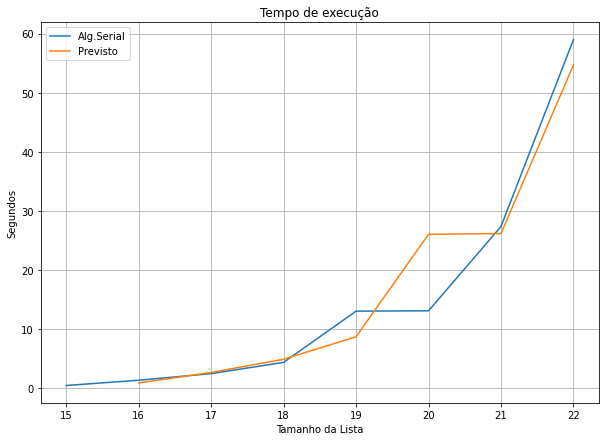

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot([tempo_exec[i][0] for i in range(len(tempo_exec))], [tempo_exec[i][1] for i in range(len(tempo_exec))], label='Alg.Serial')
plt.plot([tempo_teorico[i][0] for i in range(len(tempo_teorico)-1)], [tempo_teorico[i][1] for i in range(len(tempo_teorico)-1)], label='Previsto')
plt.title('Tempo de execução')
plt.xlabel('Tamanho da Lista')
plt.ylabel('Segundos')
plt.legend()
plt.grid()
plt.show()

# **Paralelização do Problema**
Como podemos observar, temos um código com combinações de uma lista de números que são selecionados para obter uma soma. Isto pode ser caracterizado como um problema de combinação de valores e portanto pode ser facilmente paralelizado.
Para tanto, podemos entregar a cada unidade de processamento um intervalo da combinação a ser testada.

Exemplo:

Considerando um problema com a lista de números: [10, 5, 2, 3], onde desejamos obter as combinações de números cuja a soma corresponda à (10).
Neste caso, o computador pode testar todas as combinações:

*   [0, 0, 0, 0] - Não levar nenhum produto até,
*   [1, 1, 1, 1] - Levar todos os produtos.

Facilmente podemos observar que as soluções podem ser encontradas em:

*   [0, 1, 1, 1] e
*   [1, 0, 0, 0].

Nada impede também que os testes sejam divididos em unidades de processamento individuais, pois os resultados dos testes não são interdependentes. Assim a unidade de processamento 1 (P1), poderia realizar os testes entre: 0000 e 0111; enquanto a unidade de processamento 2 (P2), poderia realizar os testes entre: 1000 e 1111; de forma paralela.

Ao final de todos os testes as unidades de processamento poderiam trocar mensagens afim de informar seus resultados parciais, unificando-os.







# **Questão da Prova:**
Observando a utilização do OpenMPI em Python abaixo, modifique "Código1", afim de paralelizar as tarefas de testes de combinações da soma da lista de números em dois processos distintos.
Plote os gráficos do tempo de execução de cada algoritmo (Serial e Paralelo), afim de observar o ganho de processamento.

#### **Código 1**
Install MPI

In [ ]:
! pip install mpi4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing MPI

In [ ]:
%%writefile codigoobi2.py
from mpi4py import MPI

import os
import random
import sys


tam_medicoes = int(sys.argv[1])

comm = MPI.COMM_WORLD
id = comm.Get_rank() 
numerodeprocessos = comm.Get_size()   

inicio = round(id * ((2**tam_medicoes) / numerodeprocessos))
fim = round(inicio + ((2**tam_medicoes) / numerodeprocessos) -1)

print('Processo: %d | inicio: %d - fim:%d' %(id,inicio,fim))

soma_usuario = 15
medicao = ''

if id == 0:
    for x in range(0,tam_medicoes):
      medicao += str(random.randint(1,10)) + ' '
    medicao = medicao[:len(medicao)-1].split(' ')
    print('A medição é:')
    print(medicao)
    print()
    for i in range(1, numerodeprocessos):
      comm.send(medicao, dest= i, tag=22)
else:
    medicao = comm.recv(source=0, tag=22)

combinacoes = []
for i in range(inicio, fim + 1):
  x = bin(i)
  combinacoes.append(x.split('b')[1].zfill(tam_medicoes))
print('As combinações são:')
print(combinacoes)
print()


total = 0
resultato_fatores = []

for l in combinacoes:
  soma = 0
  fatores = list(l)
  for pos in range(0, len(l)):
    soma += int(fatores[pos]) * int(medicao[pos])
  if soma == soma_usuario:
    total += 1
    resultato_fatores.append(fatores)


if id != 0:       
    comm.send(resultato_fatores, 0)    
else:
    for i in range(0, numerodeprocessos -1):
        resultato_fatores.append(comm.recv())

print('Total de combinações %d: %d' % (id,total))

Overwriting codigoobi2.py


Run MPI

In [ ]:
!mpirun --allow-run-as-root -np 2 python codigoobi2.py 8

Processo: 1 | inicio: 128 - fim:255
Processo: 0 | inicio: 0 - fim:127
A medição é:
['1', '10', '3', '5', '9', '2', '9', '9']

As combinações são:
['00000000', '00000001', '00000010', '00000011', '00000100', '00000101', '00000110', '00000111', '00001000', '00001001', '00001010', '00001011', '00001100', '00001101', '00001110', '00001111', '00010000', '00010001', '00010010', '00010011', '00010100', '00010101', '00010110', '00010111', '00011000', '00011001', '00011010', '00011011', '00011100', '00011101', '00011110', '00011111', '00100000', '00100001', '00100010', '00100011', '00100100', '00100101', '00100110', '00100111', '00101000', '00101001', '00101010', '00101011', '00101100', '00101101', '00101110', '00101111', '00110000', '00110001', '00110010', '00110011', '00110100', '00110101', '00110110', '00110111', '00111000', '00111001', '00111010', '00111011', '00111100', '00111101', '00111110', '00111111', '01000000', '01000001', '01000010', '01000011', '01000100', '01000101', '01000110', '

Como exemplo, podemos observar que o Processo 0 gerou o número 3 e encaminhou ao Processo 1 com sucesso.
Utilizando este exemplo de MPI, resolva a questão apresentada.

Time

In [ ]:
import time as t

tempo_teorico2=[]
tempo_exec2=[]


for i in range(15, 23):
  tempo_atual = t.time()
  string = 'mpirun --allow-run-as-root -np 2 python codigoobi2.py '+str(i)+' >> /dev/null'
  !$string
  tempo_final2 = t.time()
  tempo_final2 -= tempo_atual
  tempo_exec2.append((i,tempo_final2))
  tempo_teorico2.append((i+1, tempo_final2*2))
  
print(tempo_exec2) 
print(tempo_teorico2)

[(15, 1.446485996246338), (16, 2.1435182094573975), (17, 2.3549044132232666), (18, 4.2656919956207275), (19, 7.153522491455078), (20, 14.186343431472778), (21, 30.26026463508606), (22, 62.81302452087402)]
[(16, 2.892971992492676), (17, 4.287036418914795), (18, 4.709808826446533), (19, 8.531383991241455), (20, 14.307044982910156), (21, 28.372686862945557), (22, 60.52052927017212), (23, 125.62604904174805)]


Plotter

Importing MatPlotLib

Plotando o Gráfico

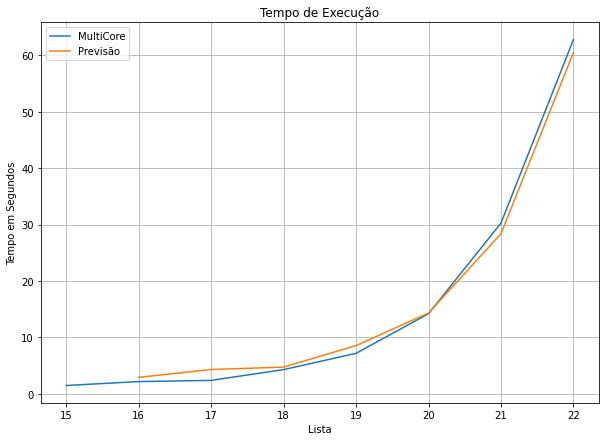

In [ ]:
import matplotlib.pyplot as plot

plot.figure(figsize=(10,7))
plot.plot([tempo_exec2[i][0] for i in range(len(tempo_exec2))], [tempo_exec2[i][1] for i in range(len(tempo_exec2))], label='MultiCore')
plot.plot([tempo_teorico2[i][0] for i in range(len(tempo_teorico2)-1)], [tempo_teorico2[i][1] for i in range(len(tempo_teorico2)-1)], label='Previsão')

#Configurando o Plotter
#Título
plot.title('Tempo de Execução')

#Eixos
plot.xlabel('Lista')
plot.ylabel('Tempo em Segundos')

#Gerando o Gráfico
plot.legend()
plot.grid()
plot.show()